В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

In [47]:
%reload_ext autoreload
%autoreload 2

from process_bank_churn import preprocess_data

##### Посилання на файл (preprocess_new_data(...) вкючено туди ж):

In [ ]:
https://github.com/lina-it/MachineLearning_HW/blob/main/process_bank_churn.py

In [41]:
raw_df = pd.read_csv('train.csv', index_col=0)
data = preprocess_data(raw_df, target_col='Exited')

In [42]:
raw_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0


In [43]:
data

{'train_X':        CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
 id                                                                         
 7180      0.599045  0.214286     0.1  0.626382       0.000000        1.0   
 10393     0.603819  0.375000     0.2  0.848836       0.000000        1.0   
 80        0.653938  0.303571     0.6  0.554522       0.333333        1.0   
 3365      0.568019  0.714286     0.0  0.000000       0.333333        0.0   
 12236     0.658711  0.053571     0.3  0.000000       0.333333        1.0   
 ...            ...       ...     ...       ...            ...        ...   
 9493      0.482100  0.267857     0.4  0.000000       0.333333        0.0   
 8463      0.577566  0.392857     0.1  0.000000       0.000000        1.0   
 8143      0.453461  0.196429     0.8  0.000000       0.333333        1.0   
 11512     0.379475  0.428571     0.7  0.000000       0.333333        0.0   
 9360      0.272076  0.160714     0.2  0.000000       0.333333   

In [32]:
data['train_X']

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
id,,,,,,,,,,,,,
7180,0.599045,0.214286,0.1,0.626382,0.000000,1.0,1.0,0.719772,1.0,0.0,0.0,0.0,1.0
10393,0.603819,0.375000,0.2,0.848836,0.000000,1.0,0.0,0.727603,1.0,0.0,0.0,1.0,0.0
80,0.653938,0.303571,0.6,0.554522,0.333333,1.0,0.0,0.872180,0.0,1.0,0.0,0.0,1.0
3365,0.568019,0.714286,0.0,0.000000,0.333333,0.0,1.0,0.257797,0.0,0.0,1.0,0.0,1.0
12236,0.658711,0.053571,0.3,0.000000,0.333333,1.0,1.0,0.742837,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9493,0.482100,0.267857,0.4,0.000000,0.333333,0.0,0.0,0.617686,1.0,0.0,0.0,1.0,0.0
8463,0.577566,0.392857,0.1,0.000000,0.000000,1.0,1.0,0.239129,1.0,0.0,0.0,1.0,0.0
8143,0.453461,0.196429,0.8,0.000000,0.333333,1.0,1.0,0.667682,1.0,0.0,0.0,0.0,1.0


**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [34]:
X_train = data['train_X']
train_targets = data['train_y']
X_val = data['val_X']
val_targets = data['val_y']

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
model = DecisionTreeClassifier(random_state=42)

In [38]:
%%time
model.fit(X_train, train_targets)

CPU times: total: 109 ms
Wall time: 112 ms


DecisionTreeClassifier(random_state=42)

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [51]:
train_preds = model.predict(X_train)

In [52]:
train_preds

array([0., 0., 0., ..., 0., 0., 0.])

In [53]:
pd.Series(train_preds).value_counts()

0.0    9558
1.0    2442
Name: count, dtype: int64

In [54]:
train_probs = model.predict_proba(X_train)

In [55]:
train_probs[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [56]:
accuracy_score(train_targets, train_preds)

1.0

In [58]:
from sklearn.metrics import roc_auc_score

In [61]:
train_probs = model.predict_proba(X_train)[:, 1]  # беремо ймовірність класу 1
val_probs = model.predict_proba(X_val)[:, 1]

from sklearn.metrics import roc_auc_score

train_auc = roc_auc_score(train_targets, train_probs)
val_auc = roc_auc_score(val_targets, val_probs)

print(f"Train ROC AUC: {train_auc:.4f}")
print(f"Validation ROC AUC: {val_auc:.4f}")

Train ROC AUC: 1.0000
Validation ROC AUC: 0.7700


In [62]:
model.score(X_val, val_targets)

0.8396666666666667

In [63]:
val_targets.value_counts() / len(val_targets)

Exited
0.0    0.796667
1.0    0.203333
Name: count, dtype: float64

З результатів видно, що модель перенавчена на тренувальних даних:

Train ROC AUC: 1.0000 — це означає, що модель ідеально класифікує тренувальні дані.

Validation ROC AUC: 0.7700 — значно нижчий показник на валідаційних даних, що вказує на те, що модель не переносить свої знання на нові дані, і на 4% краще якби модель просто відповідала завжди "0"

In [64]:
from sklearn.tree import plot_tree, export_text

###### Глибина дерева і його візуалізація

In [66]:
model.tree_.max_depth

26

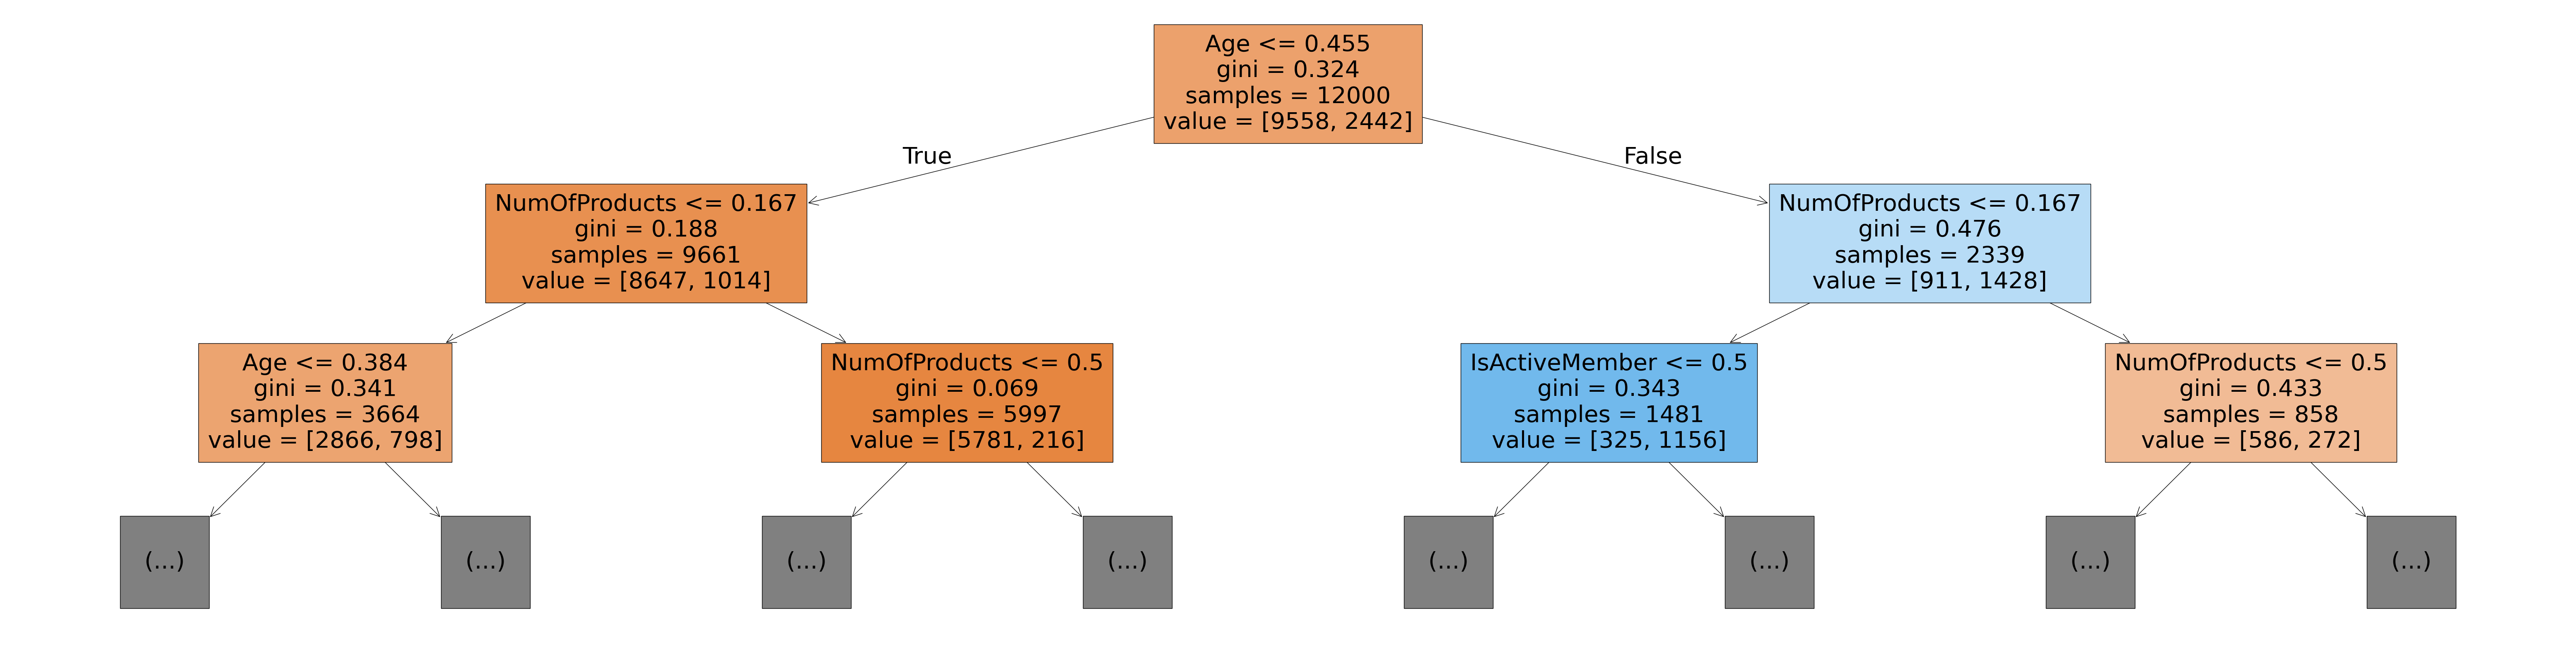

In [67]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

In [68]:
tree_text = export_text(model, max_depth=2, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Age <= 0.46
|   |--- NumOfProducts <= 0.17
|   |   |--- Age <= 0.38
|   |   |   |--- truncated branch of depth 24
|   |   |--- Age >  0.38
|   |   |   |--- truncated branch of depth 18
|   |--- NumOfProducts >  0.17
|   |   |--- NumOfProducts <= 0.50
|   |   |   |--- truncated branch of depth 19
|   |   |--- NumOfProducts >  0.50
|   |   |   |--- truncated branch of depth 7
|--- Age >  0.46
|   |--- NumOfProducts <= 0.17
|   |   |--- IsActiveMember <= 0.50
|   |   |   |--- truncated branch of depth 16
|   |   |--- IsActiveMember >  0.50
|   |   |   |--- truncated branch of depth 16
|   |--- NumOfProducts >  0.17
|   |   |--- NumOfProducts <= 0.50
|   |   |   |--- truncated branch of depth 17
|   |   |--- NumOfProducts >  0.50
|   |   |   |--- class: 1.0



Створіть датафрейм importance_df з feature importances, де в першому стовпчику feature - назва ознаки з нашого Х, а в другому importance - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [69]:
model.feature_importances_.round(2)

array([0.12, 0.36, 0.05, 0.08, 0.17, 0.01, 0.03, 0.12, 0.01, 0.01, 0.01,
       0.01, 0.01])

In [70]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [71]:
importance_df.head(10)

,feature,importance
1,Age,0.356789
4,NumOfProducts,0.168379
7,EstimatedSalary,0.123635
0,CreditScore,0.123283
3,Balance,0.079192
2,Tenure,0.052899
6,IsActiveMember,0.032688
11,Gender_Female,0.014908
9,Geography_Germany,0.014725
5,HasCrCard,0.012957


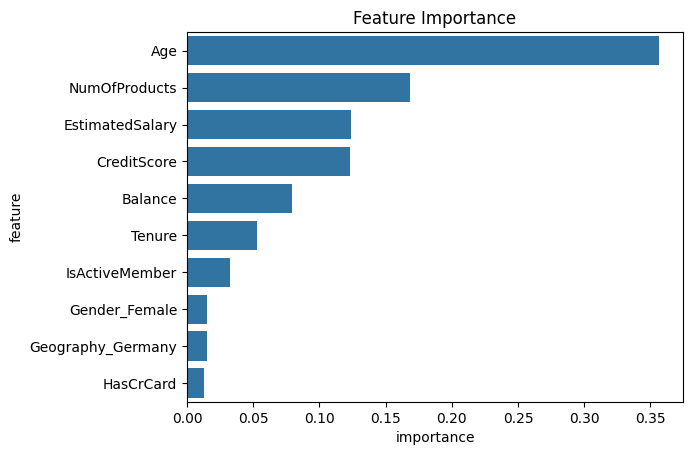

In [72]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [73]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)

In [74]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [75]:
model.score(X_train, train_targets)

0.88725

In [76]:
model.classes_

array([0., 1.])

In [77]:
model = DecisionTreeClassifier(max_leaf_nodes=60, random_state=42)

In [78]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_leaf_nodes=60, random_state=42)

In [79]:
model.score(X_train, train_targets)

0.91025

**З max_leaf_nodes=60 вийшов доволі непоганий результат**

**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [80]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_error = 1 - model.score(X_train, train_targets)
    val_error = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_error, 'Validation Error': val_error}

In [81]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

CPU times: total: 1.89 s
Wall time: 1.91 s


In [82]:
errors_df.style.background_gradient(subset='Validation Error', cmap='Blues_r')

,Max Depth,Training Error,Validation Error
0,1,0.160417,0.177333
1,2,0.134250,0.139000
2,3,0.118500,0.125333
3,4,0.112750,0.118000
4,5,0.104750,0.112667
5,6,0.095917,0.109000
6,7,0.092250,0.110333
7,8,0.081833,0.109333
8,9,0.073667,0.114667
9,10,0.064167,0.117333


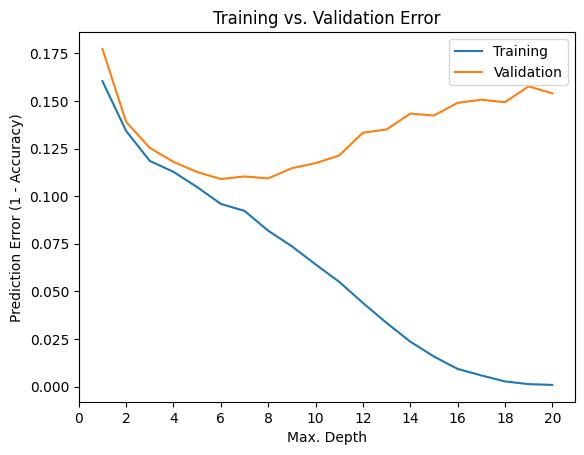

In [83]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation']);

In [84]:
# Функція для тренування моделі і розрахунку AUC
def max_depth_auc(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    
    # Прогнозуємо ймовірності для тренувальних та валідаційних даних
    train_probs = model.predict_proba(X_train)[:, 1]  # ймовірність для класу 1
    val_probs = model.predict_proba(X_val)[:, 1]
    
    # Обчислюємо AUC для тренувальних та валідаційних даних
    train_auc = roc_auc_score(train_targets, train_probs)
    val_auc = roc_auc_score(val_targets, val_probs)
    
    return {'Max Depth': md, 'Training AUC': train_auc, 'Validation AUC': val_auc}

# Виконання циклу для значень max_depth від 1 до 20
auc_df = pd.DataFrame([max_depth_auc(md) for md in range(1, 21)])

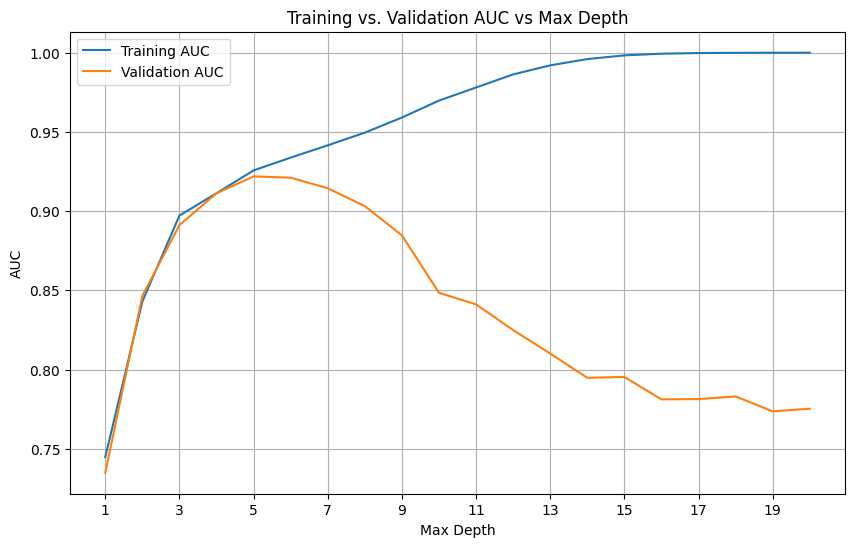

In [85]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.plot(auc_df['Max Depth'], auc_df['Training AUC'], label='Training AUC')
plt.plot(auc_df['Max Depth'], auc_df['Validation AUC'], label='Validation AUC')
plt.title('Training vs. Validation AUC vs Max Depth')
plt.xticks(range(1, 21, 2))
plt.xlabel('Max Depth')
plt.ylabel('AUC')
plt.legend()
plt.grid(True)
plt.show()

**ПО помилках найкраща глибина - 6, а по AUROC - 5**

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [87]:
model = DecisionTreeClassifier(max_depth=5, random_state=42).fit(X_train, train_targets)
model.score(X_val, val_targets)

0.8873333333333333

**Кроки 2 і 3 були виконані раніше**

In [89]:
from process_bank_churn import preprocess_new_data

In [90]:
# Завантажуємо test.csv
test_df = pd.read_csv("test.csv", index_col=0)

# Визначаємо ті самі вхідні колонки, що й у train
exclude_cols = {'id', 'RowNumber', 'CustomerId', 'Surname'}
input_cols = [col for col in test_df.columns if col not in exclude_cols]
test_inputs = test_df[input_cols]

# Використовуємо артефакти, отримані з preprocess_data
X_test = preprocess_new_data(test_inputs, data['preprocessor'])

C:\Users\linam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [91]:
# Робимо передбачення ймовірностей класу 1 для тестових даних
test_probs = model.predict_proba(X_test)[:, 1]  # Вибираємо ймовірність класу 1

In [92]:
# Формуємо DataFrame з результатами
output_df = pd.DataFrame({
    'Id': test_df.index,  # Якщо є індекси або унікальні ідентифікатори
    'Prediction': test_probs  # Ймовірність передбаченого класу 1
})

# Зберігаємо результати у файл
output_df.to_csv('submission.csv', index=False)